# **Определение уязвимых групп населения**

## **Итоговый проект первого года обучения Skillfactory Data Science Pro**

## **Часть 2. Моделирование**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\рс\AppData\Local\Temp\ipykernel_10456\736701421.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## **2.1. Очистка и разведочный анализ данных**

### **2.1.1. Описание датасета**

Датасет представляет из себя срез экономических и демографических показателей за 2020 г., по которому на момент разработки данного проекта государственными органами предоставлена наиболее полная статистика. Альтернативным вариантом выполнения проекта было бы использование наиболее свежих данных (2021 г.) там, где они есть. Однако при учете достаточно большой инерционности изменений в экономике и демографии, годовые изменения не будут существенны, и представляется целесообразным использользование самосогласованных данных по одному и тому же году. Некоторые из показателй представлены за 2016 и 2018 гг., т.к. отсутствуют более свежие данные.

Признак | Описание 
----- | ----- 
per capita | среднемесячный денежный доход на человека, в рублях| 
formal wage | среднемесячная номинальная начисленная заработная плата на человека, в рублях
child mortality | детская смертность, в процентах от количества новорожденных в 2020 г.
disabled 18_60 | инвалиды в возрасте 18-60 лет в процентах к населению соответствующего возраста (оценочно)
alco (2018) | количество впервые зарегистрированных алкогольных псизозов на 100 тыс. населения, данные 2018 г.
drug (2018) | количество впервые зарегистрированных наркотических псизозов на 100 тыс. населения, данные 2018 г.
grp | валовый региональный продукт (объем произведенных товаров и услуг) на душу населения, в рублях
living area | средняя жилая площадь на человека
bad conditions | процент респондентов, указавших на плохое состояние жилья
no funds | процент респондентов, рассчитывающих на получение жилья от государства
morbidity (2016) | общая заболеваемость на 100 тыс. населения, данные 2016 г.
congenital malformation(2016) | врожденные пороки развития на 100 тыс. населения, данные 2016 г.
psychosis (2016) | психические расстройства на 100 тыс. населения, данные 2016 г.
teenage pregnancy (2016) | подростковая беременность на 100 тыс. населения, данные 2016 г.
birth rate | рождаемость на 100 тыс. населения
population | население, количество человек
poverty | процент населения за чертой бедности
the poor: children | процент детей среди малообеспеченного населения
the poor: retired | процент пенсионеров среди малообеспеченного населения
the poor: employable | процент людей трудоспособного возраста среди малообеспеченного населения
regional production | региональное производство по всем видам деятельности на душу населения, в рублях
retail | розничная торговля на душу населения, в рублях
income | собственные доходы регионального бюджета на душу населения, в рублях
subsidies | дотации федерального бюджета на душу населения, в рублях
welfare | расходы регионального бюджета на социальную политику, в рублях на душу населения
registered crimes | общее количество зарегистрированных преступлений
felonies | количество особо тяжких преступлений
misdemeanors | количество тяжких преступлений
killed | количество погибших в результате противоправных действий
grievous harm | количество тяжело пострадавших в результате противоправных действий
children % | процент детей среди всего населения
orphanage | количество детей в детских домах
adopted % | процент усыновленных/удочеренных детей
pension | средний размер пенсии, в рублях
retired % | процент пенсионеров среди всего населения
living wage| прожиточный минимум, в рублях

In [2]:
df = pd.read_csv(
    'social_data/russia_regions_2020.csv', index_col='region')
df.head(3)

,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,no funds,...,felonies,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,23864.0,30072.0,0.485583,5.093525,88.1,17.4,291156.9,18.0,0.3,0.8642,...,1529,8887,411,647,21.153070,983,59.0,16128.19,26.8,10904.0
Амурская область,35499.0,52430.0,0.534827,5.766846,113.3,24.4,571362.1,17.3,1.3,1.0731,...,560,4967,223,255,22.619247,676,65.0,17998.70,22.4,14331.0
Архангельская область без Ненецкого АО,34852.0,52779.0,0.325623,4.674270,64.7,9.2,514200.4,16.9,1.4,1.2998,...,823,4569,166,288,20.708809,785,60.0,21753.88,26.4,14507.0


In [3]:
df.isnull().sum()

per capita                        0
formal wage                       0
child mortality                   0
disabled 18_60                    0
alco (2018)                       0
drug (2018)                       0
grp                               0
living area                       0
bad conditions                    0
no funds                          0
morbidity (2016)                  0
congenital malformation (2016)    0
psychosis (2016)                  0
teenage pregnancy (2016)          0
birth rate                        0
population                        0
poverty                           0
the poor: children                0
the poor: retired                 0
the poor: employable              0
regional production               0
retail                            0
income                            0
subsidies                         0
welfare                           0
registered crimes                 0
felonies                          0
misdemeanors                

Нулевые значения:

In [4]:
for column in df.columns:
    n_zeros = (df[column] == 0).sum()
    if n_zeros > 0:
        print('Колонка:', column, '   число нулей:', n_zeros)

Колонка: drug (2018)    число нулей: 1
Колонка: bad conditions    число нулей: 2
Колонка: no funds    число нулей: 24
Колонка: teenage pregnancy (2016)    число нулей: 32
Колонка: orphanage    число нулей: 2


### **2.1.2. Выбор признаков для проведения кластеризации**

В качестве критериев группировки регионов по уровню благосостояния выберем следующие показатели, часть из которых после анализа и отбора определят признаковое пространство для кластерного анализа:

Признак  |	Описание
---- | ----
**per capita:** |	среднемесячный денежный доход на человека
**formal wage** |	среднемесячная номинальная начисленная заработная плата на человека
**grp** |	валовый региональный продукт (объем произведенных товаров и услуг) на душу населения, в рублях
**living area** |	средняя жилая площадь на человека
**poverty** |	процент населения за чертой бедности
**regional production** |	региональное производство по всем видам деятельности на душу населения, в рублях
**retail** |	розничная торговля на душу населения
**income** |	собственные доходы регионального бюджета на душу населения, в рублях
**living wage** |	прожиточный минимум, в рублях

Данные признаки можно считать непосредственными индикаторами качества жизни. Для учета разного уровня цен в регионах некоторые показатели, такие как средний доход, зарплата и розничная торговля, необходимо будет нормировать на прожиточный минимум (этот шаг будет сделан позже). В контексте предоставления помощи регионам они также являются объективными финансовыми показателями, позволяющими провести взаимное сравнение. Другие признаки, имеющиеся в датасете, также относятся к социальному благополучию населения, однако в большей степени могут являться производными от основных факторов или зависеть одновременно от факторов, не связанных непосредственно с благосостоянием. Мы сможем провести анализ имеющихся взаимосвязей после проведения кластеризации.

In [5]:
cols = ['per capita', 'formal wage', 'grp', 'living area', 'poverty', 
         'regional production', 'retail', 'income', 'subsidies', 'living wage']
model_df = df[cols].copy()
model_df.head(3)

,per capita,formal wage,grp,living area,poverty,regional production,retail,income,subsidies,living wage
region,,,,,,,,,,
Алтайский край,23864.0,30072.0,291156.9,18.0,17.5,367883.929218,153605,24442.874394,32067.902020,10904.0
Амурская область,35499.0,52430.0,571362.1,17.3,15.2,512093.588458,245233,65276.814100,43050.621924,14331.0
Архангельская область без Ненецкого АО,34852.0,52779.0,514200.4,16.9,12.3,607920.547370,250033,48483.000199,38856.664512,14507.0


In [6]:
model_df.describe()

,per capita,formal wage,grp,living area,poverty,regional production,retail,income,subsidies,living wage
count,85.000000,85.000000,8.500000e+01,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000
mean,33020.517647,45361.082353,6.676350e+05,17.154118,13.874118,1.140388e+06,199342.423529,47485.670592,46990.414914,12856.247059
std,14912.478645,19827.022626,8.135611e+05,2.286167,5.046006,1.776882e+06,56438.817000,45311.289344,68553.968623,3144.740673
min,16877.000000,29083.000000,1.421997e+05,13.600000,4.800000,1.687176e+04,50713.000000,8737.699442,10021.505932,9834.000000
25%,24864.000000,33139.000000,3.428112e+05,15.800000,10.400000,4.155462e+05,164879.000000,26872.932758,21756.520310,10930.000000
50%,28596.000000,37820.000000,4.607202e+05,16.900000,13.300000,7.073048e+05,197028.000000,33128.431896,28985.395339,11760.000000
75%,33149.000000,48286.000000,5.829507e+05,18.100000,15.600000,1.153898e+06,232860.000000,43789.164998,43161.012387,12943.000000
max,89928.000000,120641.000000,5.206287e+06,27.800000,31.700000,1.192245e+07,408674.000000,270615.683220,583593.839079,24711.000000


### **2.1.3. Рейтинги регионов по избранным показателям**

Рассмотрим рейтинг регионов по доходам на душу населения в абсолютном выражении и с учетом нормировки на величину прожиточного минимума (количество прожиточных минимумов в среднестатистической зарплате). Видим заметную разницу между верхними и нижними строчками рейтинга как в абсолютном, так и в относительном выражении. Общая тенденция после нормировки сохраняется, однако второй график выглядит более сглаженным и лучше отражающим реальное положение дел: например, на первом графике Москва оказывается на 4-м, а Санкт-Петербург на 9-м месте, в то время как на втором графике главные города страны занимают соответственно 2-е и 3-е места после Ямало-Ненецкого АО (его положение в первой строчке связано с высокими доходами на предприятиях топливно-энергетического комплекса, так же как и в некоторых других регионах).

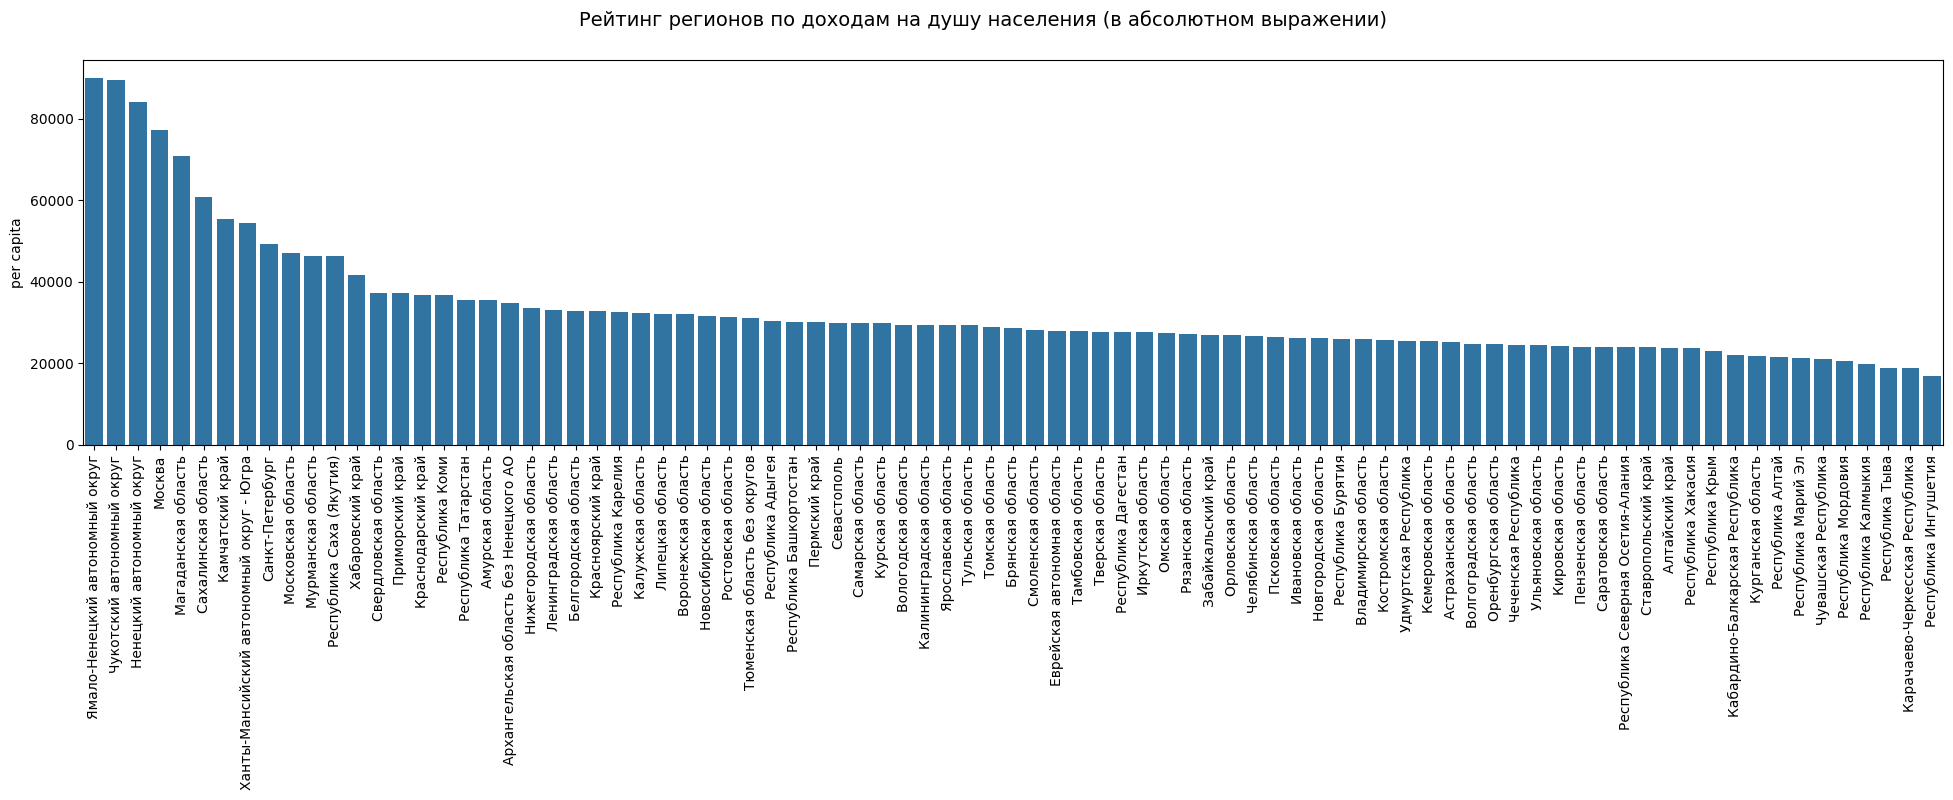

In [7]:
plot_df = model_df.sort_values(by='per capita', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='per capita')
fig.suptitle(
    'Рейтинг регионов по доходам на душу населения (в абсолютном выражении)',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

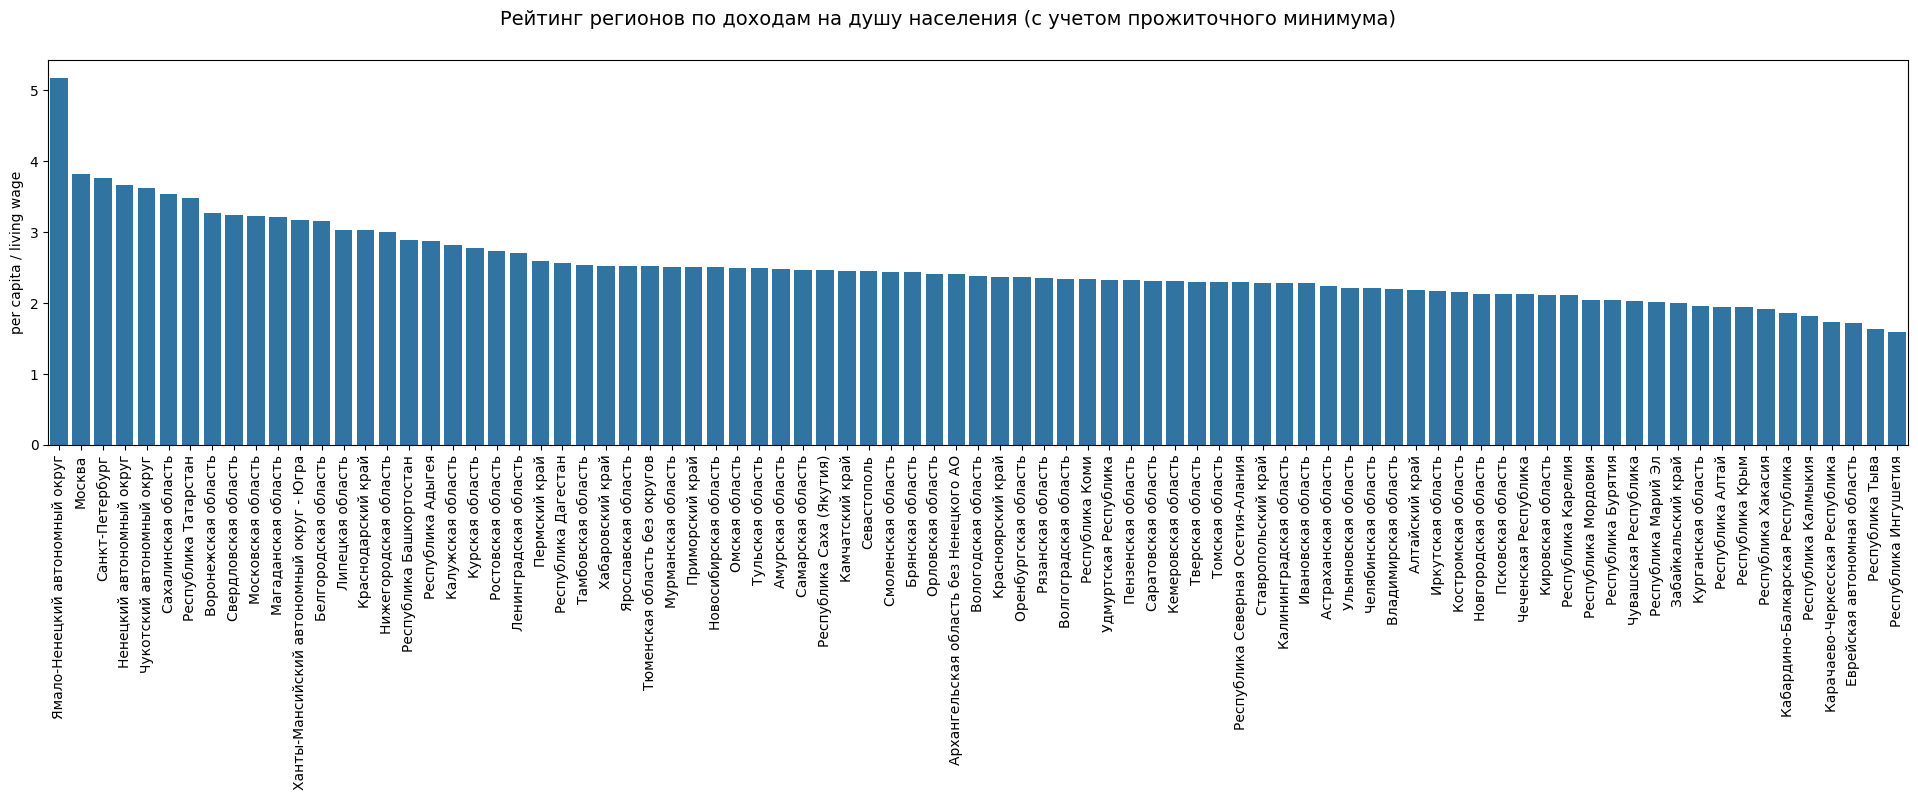

In [8]:
plot_df['per capita norm'] = plot_df['per capita'] / plot_df['living wage']
plot_df.sort_values(by='per capita norm', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='per capita norm')
fig.suptitle(
    'Рейтинг регионов по доходам на душу населения (с учетом прожиточного минимума)',
    fontsize=14);
plt.xlabel('')
plt.ylabel('per capita / living wage')
plt.xticks(rotation = 90);

Антирейтинг регионов по уровню бедности.

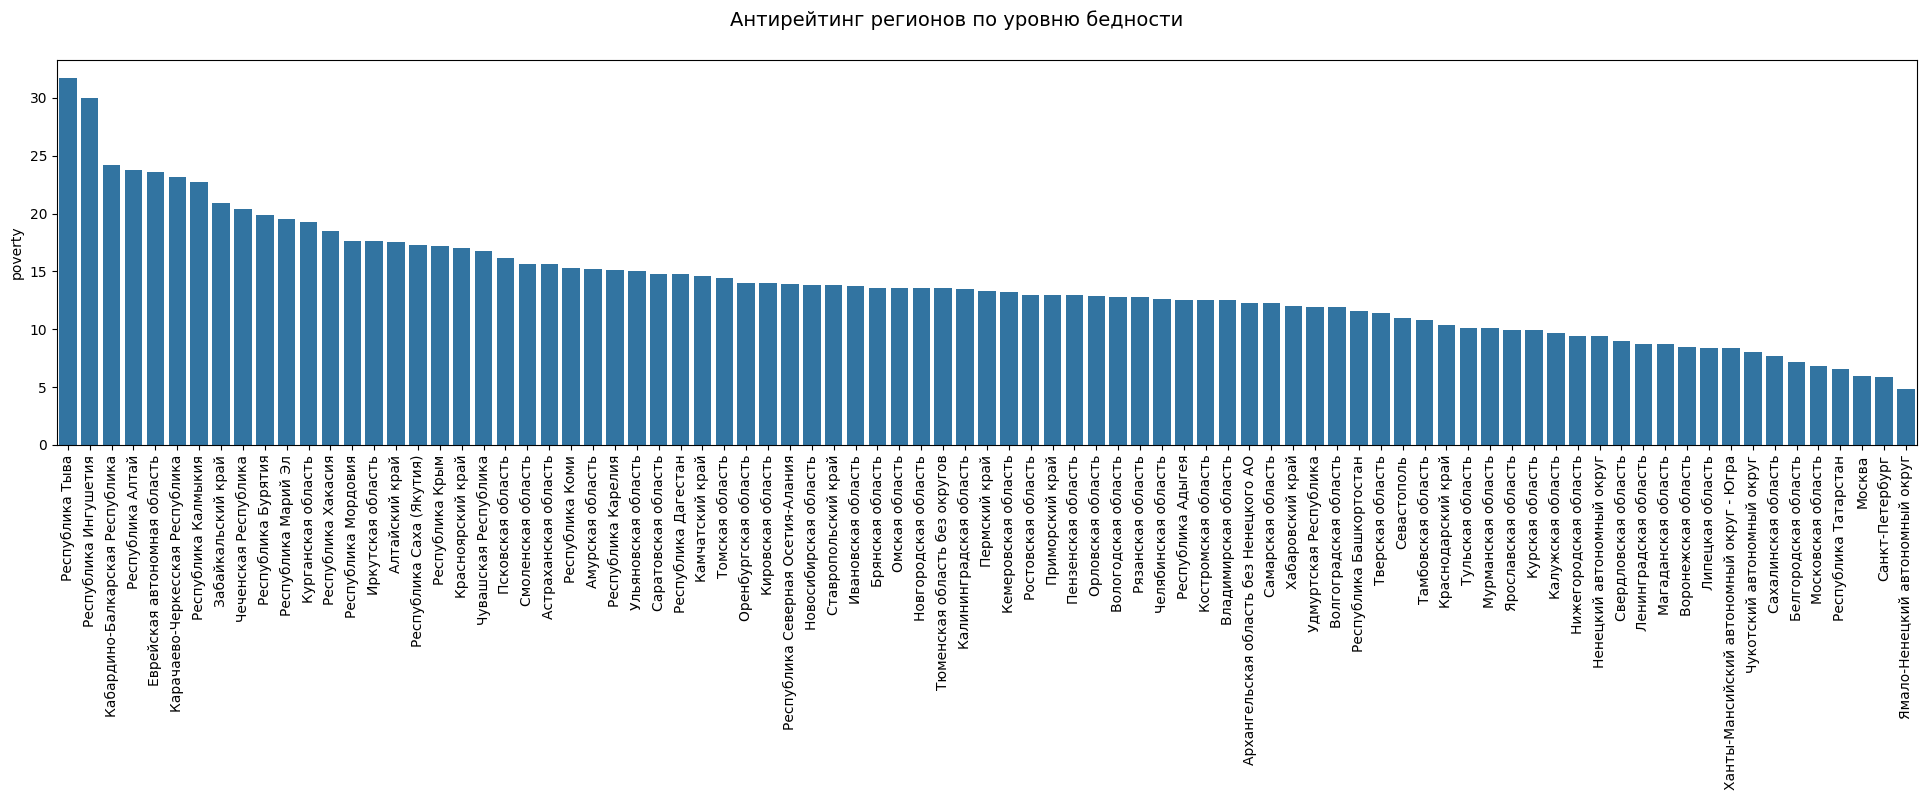

In [9]:
plot_df.sort_values(by='poverty', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='poverty')
fig.suptitle(
    'Антирейтинг регионов по уровню бедности',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Собственные доходы региональных бюджетов без дотаций из бюджетов других уровней (федерального бюджета). Данный показатель в некоторой степени отражает потенциальную способность региональных властей обеспечивать социальную политику. Одновременно нужно помнить о таких факторах как различный для разных регионов необходимый уровень расходов на содержание инфраструктуры (например в зависимости от территории, географического положения и пр.); тем не менее детальный учет этих особенностей требует сбора дополнительных данных и разработки отдельной ML-модели, поэтому здесь мы ограничиваемся достаточно грубым приближением.

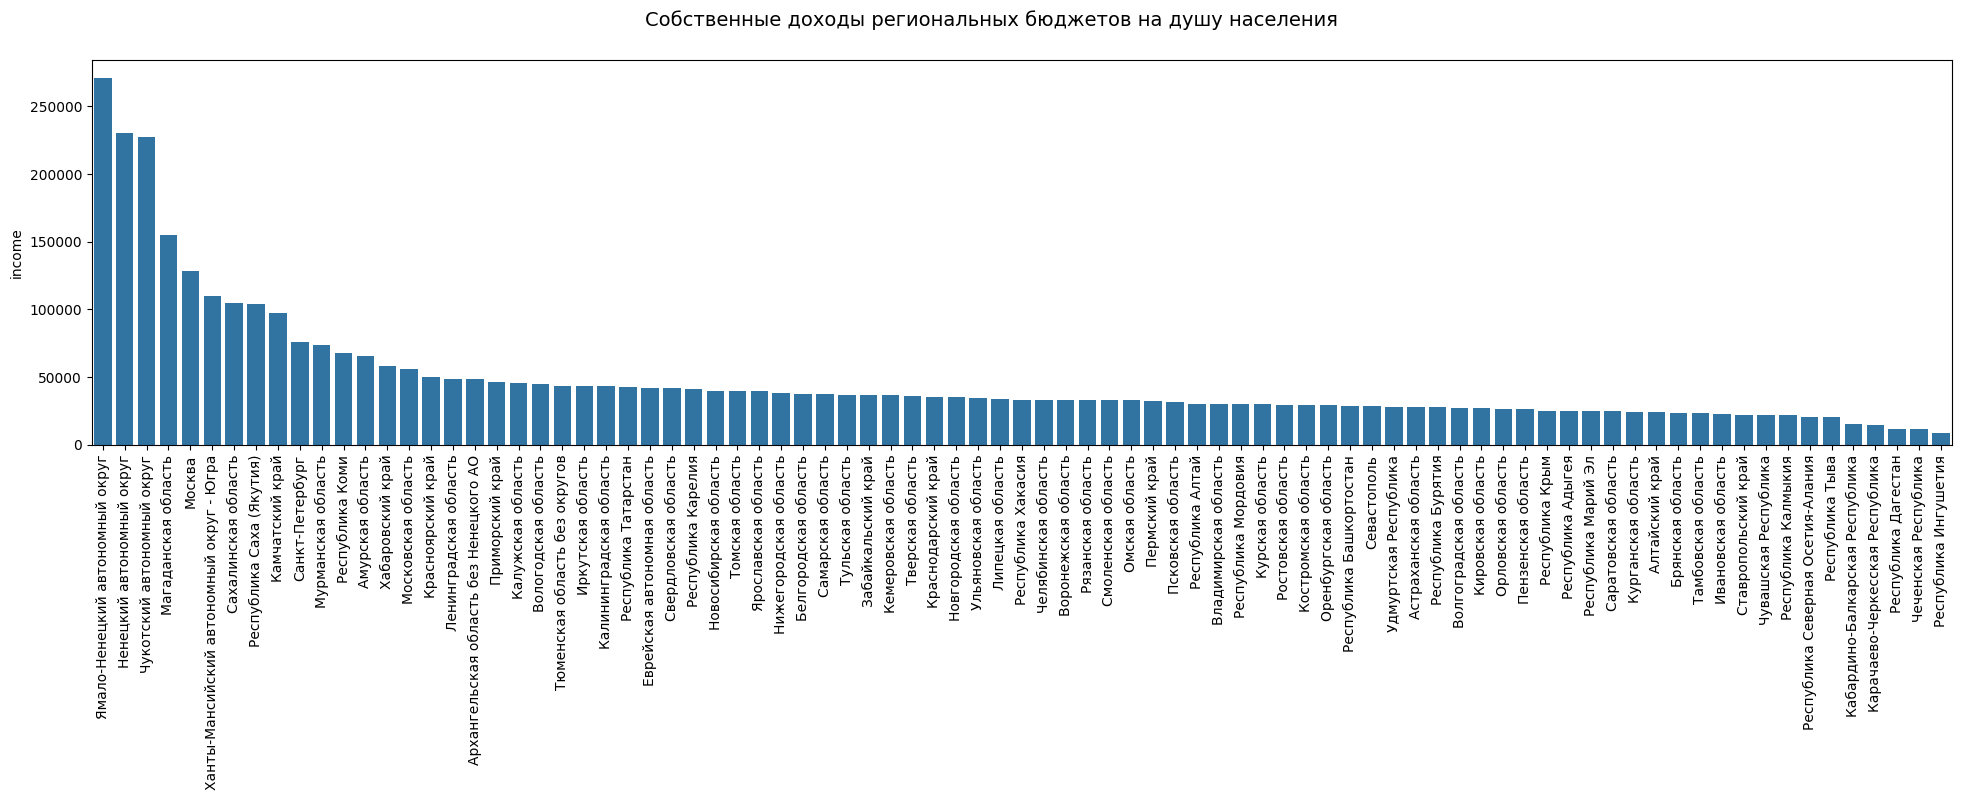

In [10]:
plot_df.sort_values(by='income', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='income')
fig.suptitle(
    'Собственные доходы региональных бюджетов на душу населения',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Обеспеченность жилплощадью

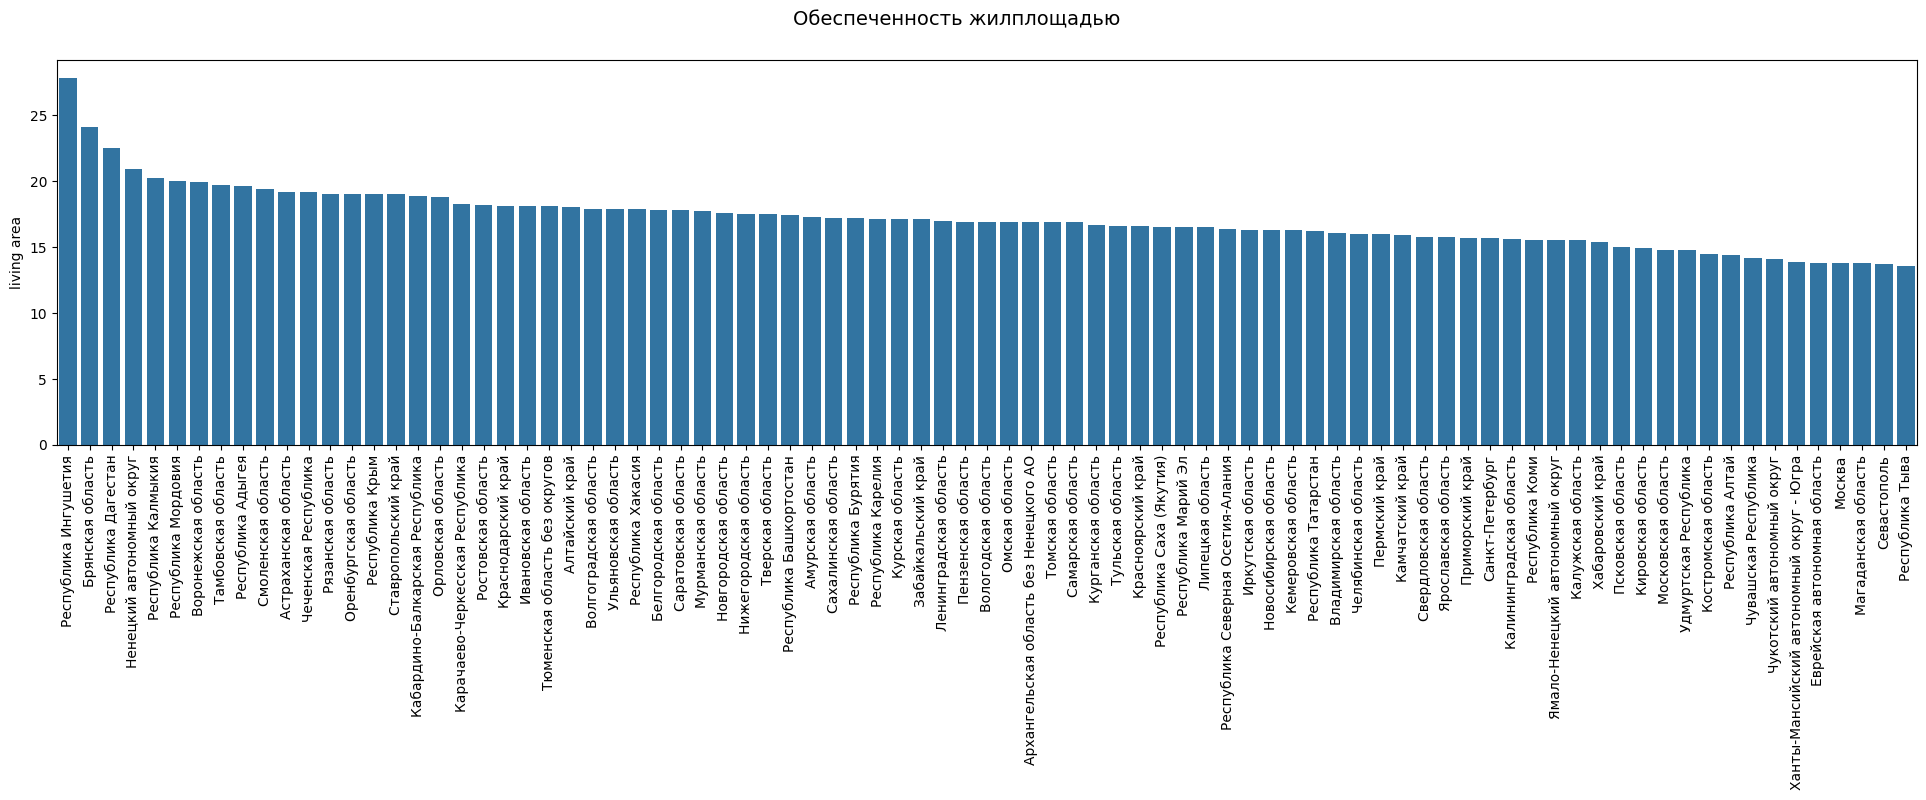

In [11]:
plot_df.sort_values(by='living area', ascending=False, inplace=True)
fig = plt.figure(figsize=(24,5))
sns.barplot(data=plot_df, x=plot_df.index, y='living area')
fig.suptitle(
    'Обеспеченность жилплощадью',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

### **2.1.4. Распределения и преобразования признаков**

Модернизируем модельный датасет: нормируем некоторые показатели на прожиточный минимум в регионе.

In [12]:
! pip install kaleido

In [13]:
model_df['per capita norm'] = model_df['per capita'] / model_df['living wage']
model_df['formal wage norm'] = model_df['formal wage'] / model_df['living wage']
model_df['retail norm'] = model_df['retail'] / model_df['living wage']

model_df.drop(columns=['per capita', 'formal wage', 'retail'], axis=1, inplace=True)

In [14]:
cols = ['per capita norm', 'formal wage norm', 'grp', 'living area', 
        'poverty', 'regional production', 'retail norm', 'income']
fig = make_subplots(rows=2, cols=4, subplot_titles=cols)
fig.add_trace(go.Histogram(x=model_df['per capita norm'], nbinsx=20),
              row=1, col=1)
fig.add_trace(go.Histogram(x=model_df['formal wage norm'], nbinsx=20),
              row=1, col=2)
fig.add_trace(go.Histogram(x=model_df['grp'], nbinsx=20),
              row=1, col=3)
fig.add_trace(go.Histogram(x=model_df['living area'], nbinsx=20),
              row=1, col=4)
fig.add_trace(go.Histogram(x=model_df['poverty'], nbinsx=20),
              row=2, col=1)
fig.add_trace(go.Histogram(x=model_df['regional production'], nbinsx=20),
              row=2, col=2)
fig.add_trace(go.Histogram(x=model_df['retail norm'], nbinsx=20),
              row=2, col=3)
fig.add_trace(go.Histogram(x=model_df['income'], nbinsx=20),
              row=2, col=4)
fig.update_layout(title='Распределения признаков', 
                  showlegend=False, width=1200, height=500)
fig.layout.bargap = 0.1
fig.show(renderer='plotly_mimetype')

Видно, что признаки 'grp', 'regional production', 'income' следует перевести в логарифмическую шкалу. Также отметим, что в нашем проекте мы не можем исключать какие-либо экстремальные значения (выбросы), т.к. с высокой степенью уверенности имеющиеся численные оценки носят достаточно объективный характер, отбрасывать некоторые регионы бессмысленно с точки зрения достижения целей проекта, а приведение экстремальных значений к медиане способно значительно исказить объективную картину.

In [15]:
model_df['log grp'] = np.log(model_df['grp'])
model_df['log regional production'] = np.log(model_df['regional production'])
model_df['log income'] = np.log(model_df['income'])
model_df.drop(columns=['grp', 'regional production', 'income'], 
              axis=1, inplace=True)

cols = ['per capita norm', 'formal wage norm', 'log grp', 'living area', 
        'poverty', 'log regional production', 'retail norm', 'log income']
fig = make_subplots(rows=2, cols=4, subplot_titles=cols)
fig.add_trace(go.Histogram(x=model_df['per capita norm'], nbinsx=20),
              row=1, col=1)
fig.add_trace(go.Histogram(x=model_df['formal wage norm'], nbinsx=20),  
              row=1, col=2)
fig.add_trace(go.Histogram(x=model_df['log grp'], nbinsx=20),
              row=1, col=3)
fig.add_trace(go.Histogram(x=model_df['living area'], nbinsx=20),
              row=1, col=4)
fig.add_trace(go.Histogram(x=model_df['poverty'], nbinsx=20),
              row=2, col=1)
fig.add_trace(go.Histogram(x=model_df['log regional production'], nbinsx=20),
              row=2, col=2)
fig.add_trace(go.Histogram(x=model_df['retail norm'], nbinsx=20),
              row=2, col=3)
fig.add_trace(go.Histogram(x=model_df['log income'], nbinsx=20),
              row=2, col=4)
fig.update_layout(title='Распределения признаков после преобразований', 
                  showlegend=False, width=1200, height=500)
fig.layout.bargap = 0.1
fig.show(renderer='plotly_mimetype')

Упорядочим колонки после преобразований

In [16]:
cols = ['per capita norm', 'formal wage norm', 'log grp', 
        'log regional production', 'log income', 'retail norm', 
        'living area', 'poverty']
model_df = model_df[cols].copy()

Тест Шапиро на нормальность распределения показывает, что только признак 'retail norm' (розничная торговля) можно считать нормально распределенным (p-value = 0.6).

In [17]:
for col in model_df.columns:
    _, p = shapiro(model_df[col])
    print(f'{col}:   p-value = {p:.3f}')

per capita norm:   p-value = 0.000
formal wage norm:   p-value = 0.000
log grp:   p-value = 0.000
log regional production:   p-value = 0.002
log income:   p-value = 0.000
retail norm:   p-value = 0.597
living area:   p-value = 0.000
poverty:   p-value = 0.000


### **2.1.5. Корреляции, мультиколлинеарность**

Корреляционная матрица. Поскольку распределения далеки от нормальных, рассмотрим ранговые критерии Спирмена (предполагает линейную зависимость между признаками) и Кендалла.

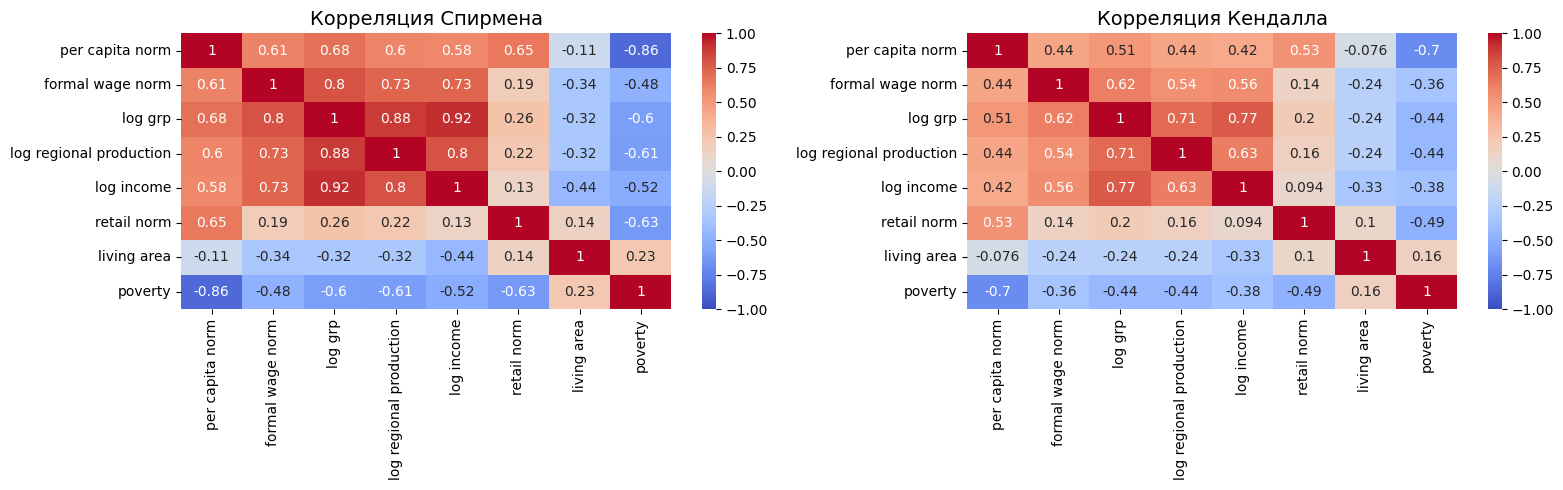

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.heatmap(model_df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(model_df.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout();

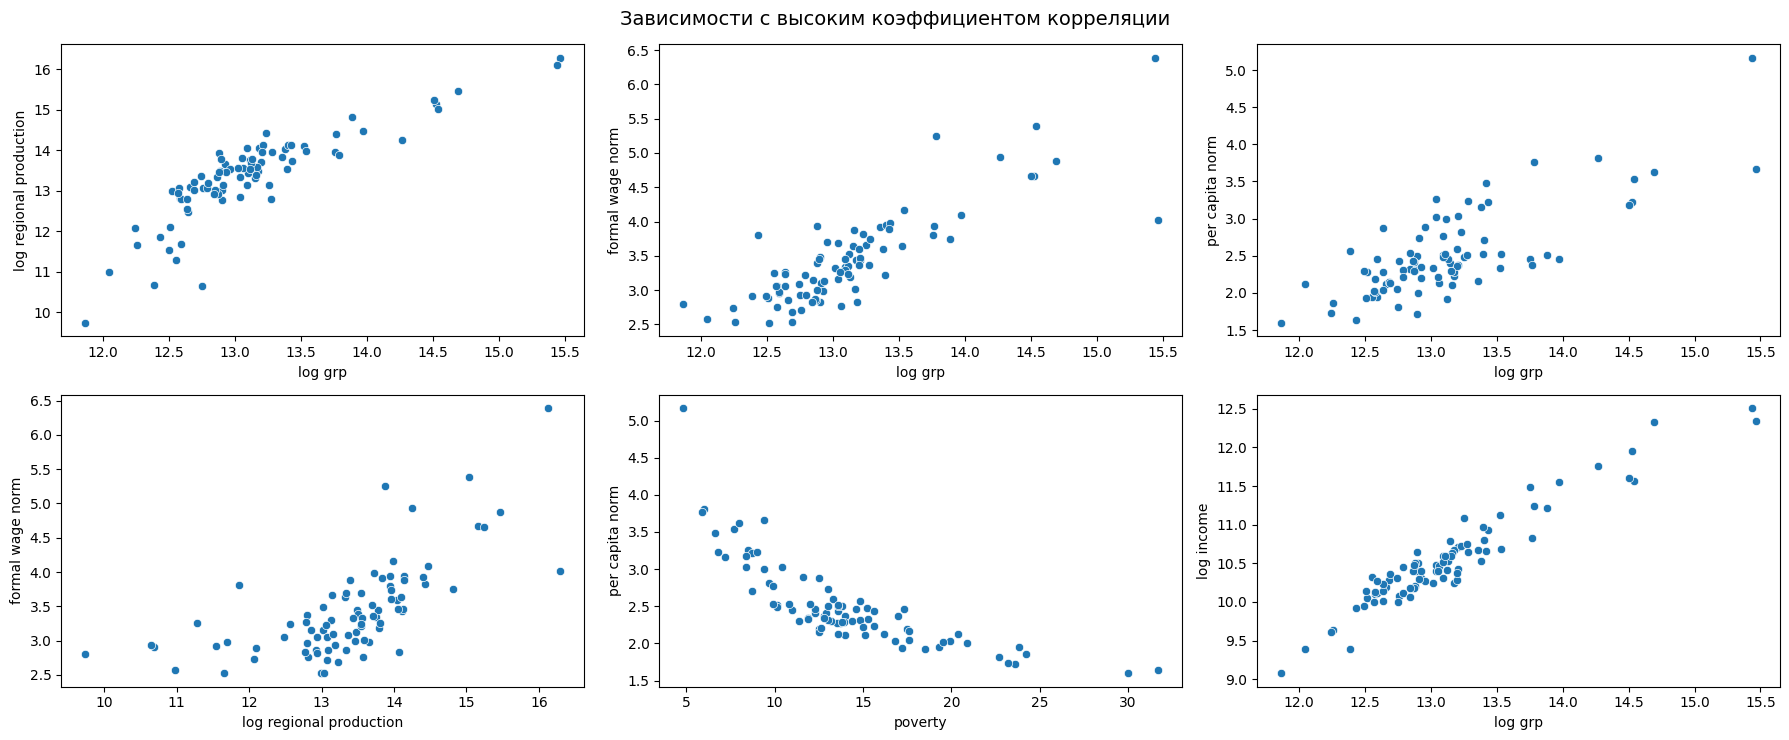

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(18, 7.5))
sns.scatterplot(
    data=model_df, x= 'log grp', y ='log regional production', ax=ax[0, 0])
sns.scatterplot(
    data=model_df, x= 'log grp', y ='formal wage norm', ax=ax[0, 1])
sns.scatterplot(
    data=model_df, x= 'log grp', y ='per capita norm', ax=ax[0, 2])
sns.scatterplot(
    data=model_df, x= 'log regional production', y ='formal wage norm', ax=ax[1, 0])
sns.scatterplot(
    data=model_df, x= 'poverty', y ='per capita norm', ax=ax[1, 1])
sns.scatterplot(
    data=model_df, x= 'log grp', y ='log income', ax=ax[1, 2])
plt.suptitle('Зависимости с высоким коэффициентом корреляции', fontsize=14)
plt.tight_layout();

Некоторые из наблюдаемых зависимостей вполне ожидаемы: так, валовый региональный продукт непосредственно связан с производством в регионе, а уровень бедности - с доходом на душу населения. Также в целом понятна высокая корреляция валового регионального продукта с собственным бюджетом региона. По этой причине признаки-"дублеры" следует исключить. В то же время, мы оставляем часть признаков, где связь не столь очевидна, например валовый региональный продукт (log grp) и среднуюю зарплату (formal wage norm). Возможные "неприятности", связанные с наличием высокой корреляции, при кластеризации можно будет исключить путем использования PCA. Также можно сказать, что мы отсекаем признаки, скоррелированные по критерию Кендалла (corr $\ge+0.7, \le-0.7$
).

model_df.drop(
    columns=['log regional production', 'per capita norm', 'log income'], 
    axis=1, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.heatmap(model_df.corr(method='spearman'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[0])
sns.heatmap(model_df.corr(method='kendall'), 
            annot=True, cmap='coolwarm', vmin=-1, ax=ax[1])
ax[0].set_title('Корреляция Спирмена', fontsize=14)
ax[1].set_title('Корреляция Кендалла', fontsize=14)
plt.tight_layout();

### **2.1.6. Масштабирование**

Масштабируем признаки по минимальным и максимальным значениям.

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(model_df)

## **2.2. Кластеризация**

**2.2.1. Базовая модель: k-means**

В качестве базовой модели используем k-means. Выбираем количество кластеров.

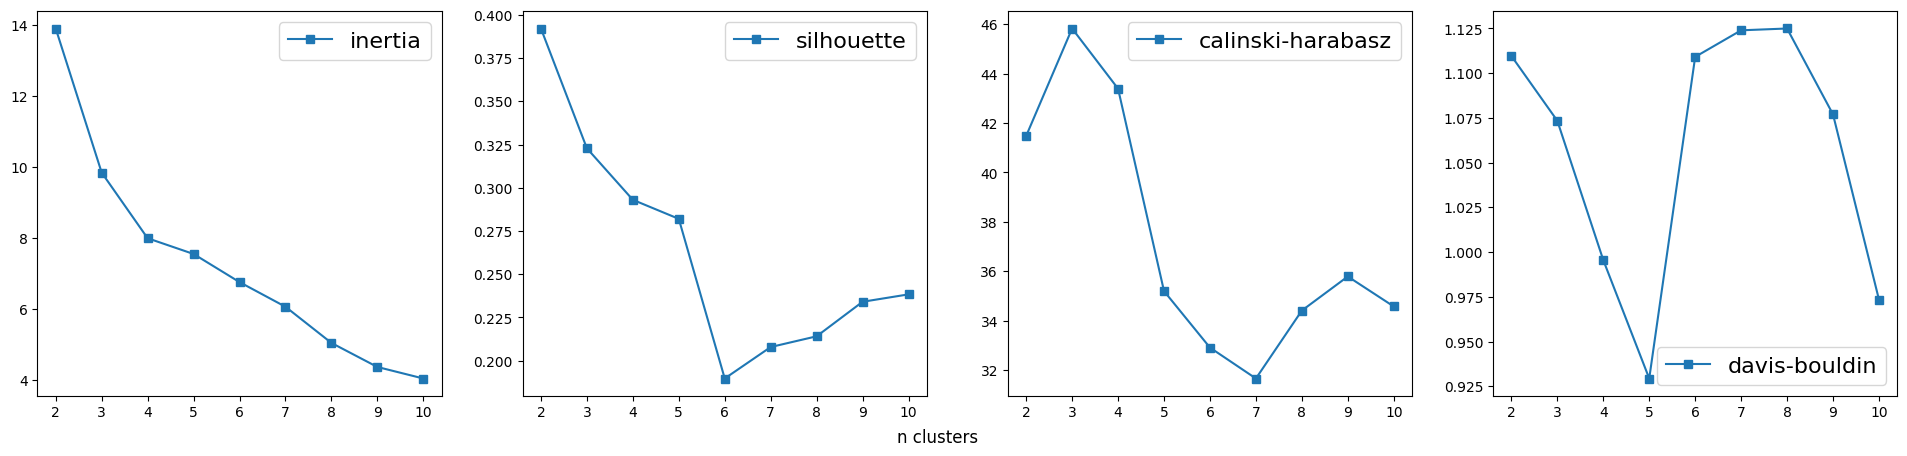

In [21]:
def plot_metrics(X):
    """Plot clustering metrics depending on the number of clusters"""
    inertia = []
    silhouette = []
    calinski_harabasz = []
    davis_bouldin = []
    
    for n_cl in range(2, 11):
        kmeans = cluster.KMeans(n_clusters=n_cl, random_state=42)
        kmeans.fit(X)
    
        inertia.append(kmeans.inertia_)
        silhouette.append(metrics.silhouette_score(
            X, kmeans.labels_))
        calinski_harabasz.append(metrics.calinski_harabasz_score(
            X, kmeans.labels_))
        davis_bouldin.append(metrics.davies_bouldin_score(
            X, kmeans.labels_))
        
    fig, ax = plt.subplots(1, 4, figsize=(24,5))
    
    ax[0].plot(range(2, 11), inertia, 's-', label='inertia')
    ax[1].plot(range(2, 11), silhouette, 's-', label='silhouette')
    ax[2].plot(range(2, 11), calinski_harabasz, 's-', label='calinski-harabasz')
    ax[3].plot(range(2, 11), davis_bouldin, 's-', label='davis-bouldin')
    ax[0].legend(prop={'size': 16})
    ax[1].legend(prop={'size': 16})
    ax[2].legend(prop={'size': 16})
    ax[3].legend(prop={'size': 16});
    fig.supxlabel('n clusters')
    
        
plot_metrics(X)

Разделение кластеров нечеткое (коэффициент силуэта везде меньше 0.4, наибольшее значение при минимальном количестве кластеров). Тем не менее, ориентируясь на метод локтя (inertia) и индекс Сalinski-Harabasz, можно принять количество кластеров $n = 4$. В качестве графического представления результатов кластеризации используем t-SNE преобразование пятимерного признакового пространства на плоскость. Выводим значения метрик качества кластеризации.

Silhouette: 0.293
Calinski-Harabatz: 43.386
Davis-Bouldin: 0.995


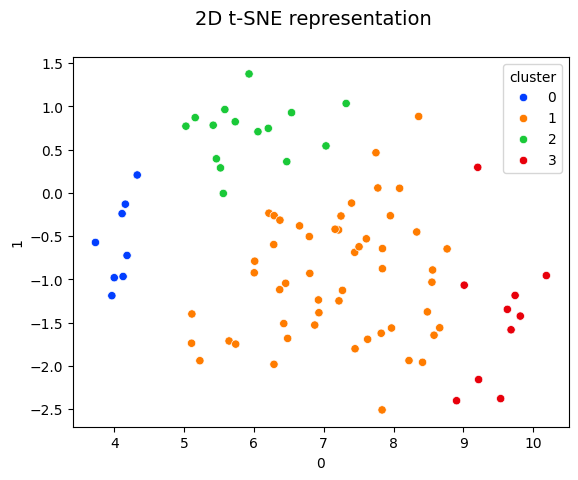

In [22]:
def plot_results(X, labels):
    "Plotting a 2D t-SNE representation and calculated metrics"
    tsne = TSNE(n_components=2, perplexity=50, init='pca',
                learning_rate='auto', random_state=42)
    df_tsne = pd.DataFrame(tsne.fit_transform(X))
    df_tsne['cluster'] = labels
    fig = plt.figure()
    sns.scatterplot(x=df_tsne[0], y=df_tsne[1],
                    hue=df_tsne['cluster'], palette='bright')
    fig.suptitle('2D t-SNE representation', fontsize=14);

    print('Silhouette: {:.3f}'.format(
        metrics.silhouette_score(X, labels)))
    print('Calinski-Harabatz: {:.3f}'.format(
        metrics.calinski_harabasz_score(X, labels)))
    print('Davis-Bouldin: {:.3f}'.format(
        metrics.davies_bouldin_score(X, labels)))
        

kmeans = cluster.KMeans(n_clusters=4, random_state=42)
bm_labels = kmeans.fit_predict(X)
plot_results(X, bm_labels)

### **2.2.2. Понижение размерности. PCA + k-means**

Число главных компонент: 3


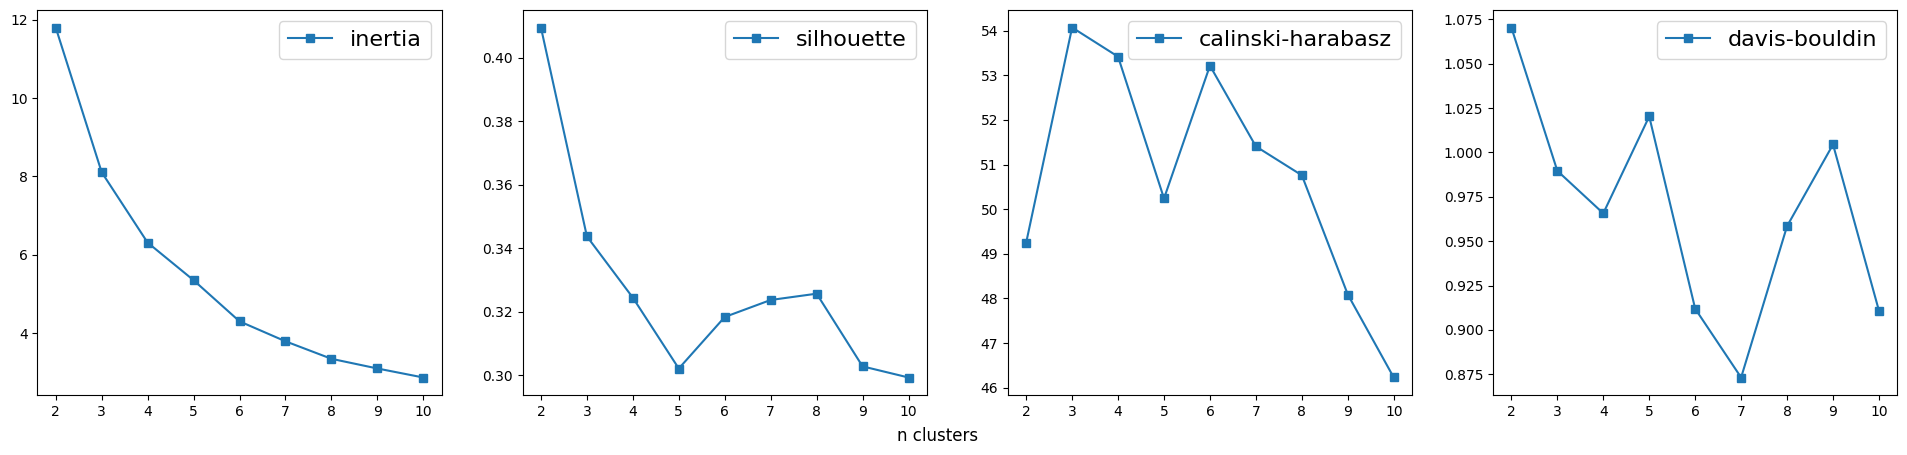

In [23]:
pca = PCA(n_components=0.9)  # 90% of explained dispersion
X_pca = pca.fit_transform(X)
print(f'Число главных компонент: {pca.n_components_}')

plot_metrics(X_pca)

Коэффициент силуэта показывает максимум при количестве кластеров $n = 3$, однако по методу локтя и коэффициенту Сalinski-Harabasz лучше оставить $n = 4$. Заметно, что метрики в целом показывают лучшее качество, чем у базовой модели.

Silhouette: 0.324
Calinski-Harabatz: 53.420
Davis-Bouldin: 0.966
Rand score (сравнение с базовой моделью): 0.886555


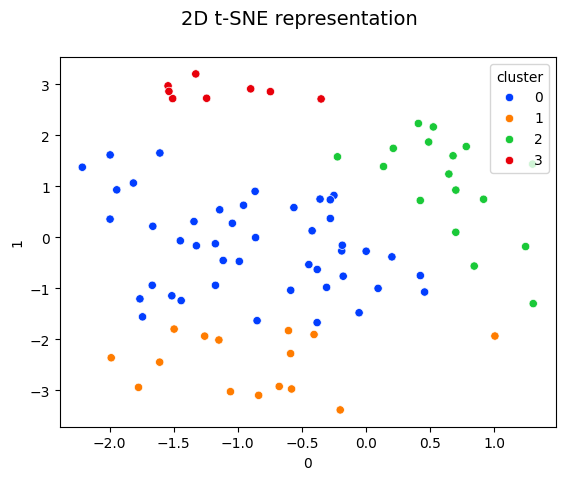

In [24]:
kmeans_pca = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit_predict(X_pca)
plot_results(X_pca, kmeans_pca.labels_)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, kmeans_pca.labels_)))

В данном случае мы может также визуализировать результат кластеризации непосредственно в пространстве трех главных компонент.

In [25]:
fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=kmeans_pca.labels_, width=650, height=400)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
#fig.show()

In [26]:
import plotly.io as pio

pio.show(fig, renderer='plotly_mimetype')

### **2.2.3. Тестирование различных алгоритмов кластеризации, валидация**

Используем данные после PCA-преобразования: массив X_pca. Количество кластеров оставляем равным четырем.

Silhouette: 0.355
Calinski-Harabatz: 47.748
Davis-Bouldin: 0.809
Rand score (сравнение с базовой моделью): 0.850420


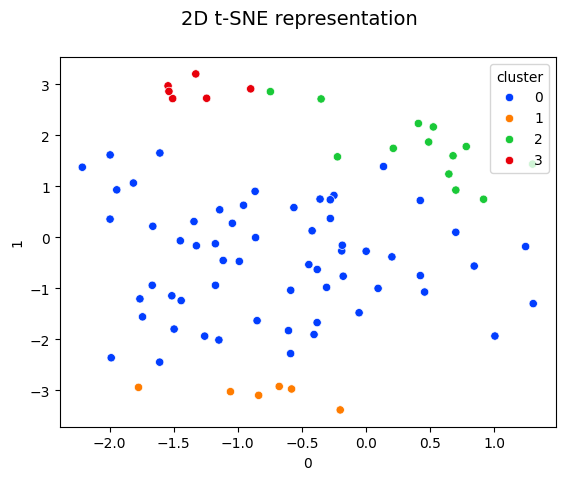

In [27]:
# Гауссова смесь, наилучший вариант: covariance_type='tied'
gmix = GaussianMixture(
    n_components=4, random_state=42, covariance_type='tied')
labels = gmix.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Silhouette: 0.336
Calinski-Harabatz: 52.191
Davis-Bouldin: 0.822
Rand score (сравнение с базовой моделью): 0.928852


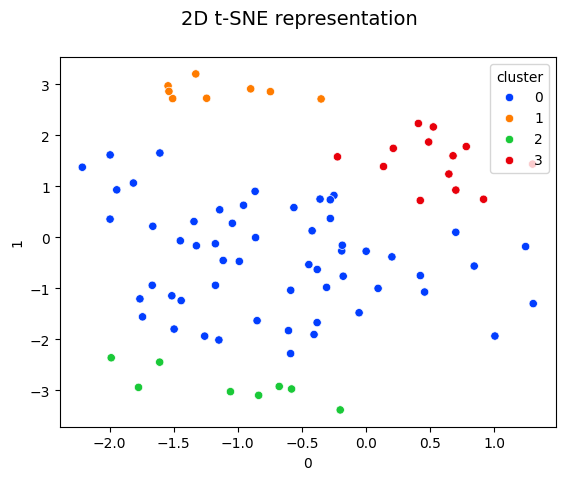

In [28]:
# Агломеративная кластеризация, наилучший вариант: linkage='ward'
tree_like = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = tree_like.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Silhouette: 0.333
Calinski-Harabatz: 56.112
Davis-Bouldin: 0.654
Rand score (сравнение с базовой моделью): 0.717087


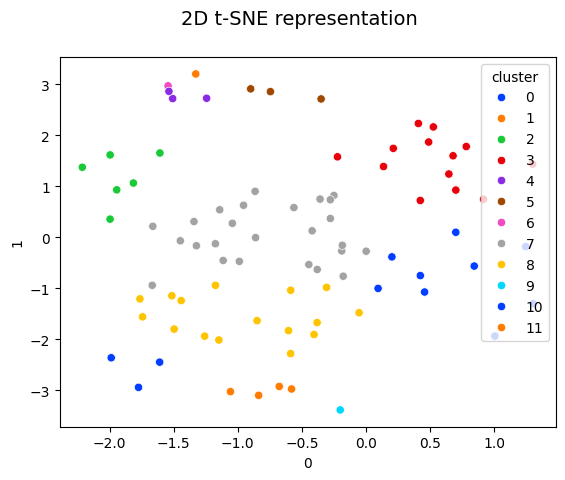

In [29]:
# Распространение сходства
aff_prop = cluster.AffinityPropagation(damping=0.9, random_state=42)
labels = aff_prop.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

Silhouette: 0.314
Calinski-Harabatz: 47.641
Davis-Bouldin: 0.943
Rand score (сравнение с базовой моделью): 0.846218


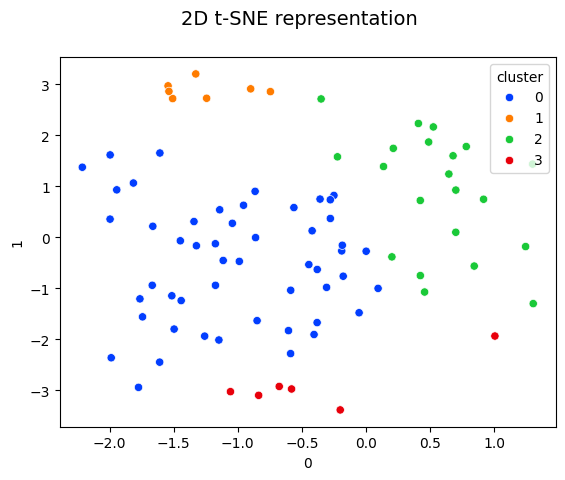

In [30]:
spectral = cluster.SpectralClustering(n_clusters=4)
labels = spectral.fit_predict(X_pca)
plot_results(X_pca, labels)
print('Rand score (сравнение с базовой моделью): {:3f}'
      .format(metrics.rand_score(bm_labels, labels)))

**Выводы по результатам тестирования и валидации**

Гауссова смесь показывает наилучшие метрики (коэффициент силуэта и индекс Davies-Bouldin). Наилучший коэффициент Calinski-Harabatz у метода k-means на PCA-признаках. Ориентируясь на два индекса и визуализацию результата кластеризации в пространстве PCA-компонент (ниже), в качестве окончательной модели выбираем "гауссову смесь на PCA-компонентах". Отметим, что в качестве альтернативного метода разбиения выборки на кластеры можно использовать k-means, который дает несколько более равномерное разбиение и большее количество неблагополучных регионов.

Также отметим, что индексы Рэнда при сравнении с базовой моделью остаются достаточно высокими, что говорит об устойчивости общей структуры распределения объектов по кластерам при использовании разных алгоритмов. Вариации индекса Рэнда объясняются различными перераспределениями "граничных" (между кластерами) точек. Это хорошо демонстрируется визуализацией результатов с посщью tSNE, а также в трехмерном пространстве PCA-компонент. Таким образом, можно констатировать, что общая структура полученных кластеров в достаточной мере устойчива.

In [31]:
# Гауссова смесь, наилучший вариант: covariance_type='tied'
gmix = GaussianMixture(
    n_components=4, random_state=42, covariance_type='tied')
labels_gmix = gmix.fit_predict(X_pca)
df['cluster'] = labels_gmix

# Упорядочим нумерацию кластеров 
df['cluster'] = df['cluster'].replace({2:0, 0:1, 3:2, 1:3})
df.to_csv('social_data/russia_regions_2020_clusters.csv')
df['cluster'].to_csv('social_data/labels.csv')

fig = px.scatter_3d(
    x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
    title='Кластеры в пространстве трех главных компонент (PCA)',
    color=df['cluster'], width=650, height=400)
fig.update_traces(marker={'size':3}, marker_line_width=0.5)
fig.show()
#fig.write_image('figs_3d/gmix_pca.png')

In [32]:
df

,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,no funds,...,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage,cluster
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,23864.0,30072.0,0.485583,5.093525,88.1,17.4,291156.9,18.0,0.3,0.8642,...,8887,411,647,21.153070,983,59.0,16128.19,26.8,10904.0,1
Амурская область,35499.0,52430.0,0.534827,5.766846,113.3,24.4,571362.1,17.3,1.3,1.0731,...,4967,223,255,22.619247,676,65.0,17998.70,22.4,14331.0,1
Архангельская область без Ненецкого АО,34852.0,52779.0,0.325623,4.674270,64.7,9.2,514200.4,16.9,1.4,1.2998,...,4569,166,288,20.708809,785,60.0,21753.88,26.4,14507.0,1
Астраханская область,25199.0,38885.0,0.586564,3.632293,22.2,0.2,526950.9,19.2,0.8,2.9028,...,2818,93,169,22.620409,376,66.0,15427.85,23.9,11287.0,1
Белгородская область,32841.0,37442.0,0.380505,7.250936,41.3,3.2,646569.0,17.8,0.7,0.3840,...,3208,159,249,18.764730,219,82.0,17438.93,27.2,10403.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,24596.0,29771.0,0.601109,17.854091,4.1,0.6,171029.5,19.2,0.6,0.5539,...,717,24,21,37.089495,0,100.0,16165.00,10.3,11572.0,3
Чувашская Республика,21155.0,31844.0,0.212258,4.385201,79.0,1.2,287210.3,14.2,1.2,1.8768,...,3418,141,188,21.259663,161,77.0,16111.97,24.9,10414.0,1
Чукотский автономный округ,89541.0,120641.0,1.489758,3.515586,208.7,0.0,2404271.2,14.1,1.9,0.0000,...,167,28,20,25.099427,60,69.0,30144.56,14.5,24711.0,2


**Вывод**

Из ранее подготовленного датасета данных по российским регионам в качестве критериев для последующей их группировки в кластеры с близкими параметрами выбраны признаки, отражающие социально-экономическое благополучие субъектов федерации. Построены рейтинги регионов по избранным показателям. Исследованы распределения выбранных признаков и корреляции между ними, произведен отбор и выполнены необходимые преобразования. Итоговый модельный датасет для проведения кластеризации включает в себя 5 независимых характеристик:

* номинальную заработную плату, нормированную на прожиточный минимум в регионе;
* валовый региональный продукт в логарифмической шкале;
объем розничной торговли на человека, нормированный на прожиточный минимум в * регионе;
* жилую площадь на человека;
* процент населения за чертой бедности.

С помощью различных внутренних метрик кластеризации оценено оптимальное количество кластеров (четыре). Построена базовая модель (k-means). Выполнено PCA-понижение размерности (3 главных компоненты, объясняющие 90% дисперсии). Протестированы различные алгоритмы кластеризации, из них на основе метрик и визуализации признакового пространства выбран оптимальный ("гауссова смесь на PCA-компонентах"), регионам присвоены соответствующие метки. Продемонстрирована устойчивость общей структуры кластеров при использовании различных алгоритмов кластеризации. При необходимости в качестве альтернативы можно также использовать k-means на PCA-компонентах, дающий похожие значения метрик и несколько большее число финансово неблагополучных регионов.